In [106]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
from scipy import ndimage, misc

# Convolutional Neural Networks
When thinking about convolution the first thing that comes to my mind as someone with a background in stochastics is taking the sum of random variables.
An easy example would be to consider two fair six sided dice and look at the distribution of the sum of those.
Let therefore $X$ and $Y$ be two independent random variables which represent the two dice, i.e.
$\mathbb{P}(X = i) = \mathbb{P}(Y = i) = \frac{1}{6}$ for all $i=1,...,6$. Then both, $X$ and $Y$ have a discrete uniform distribution.

## Convolution of images with kernes from scratch

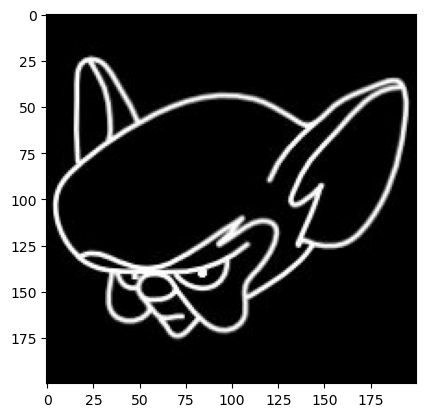

In [2]:
img = ((255 - plt.imread('Brain.jpg'))/255)[:,:,0]
plt.imshow(img,cmap='gray')

C:\Users\lachlinu\AppData\Local\Temp\ipykernel_10180\3150340000.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\torch\csrc\utils\tensor_new.cpp:204.)
  t_img = torch.tensor([[img]]).type(torch.float)


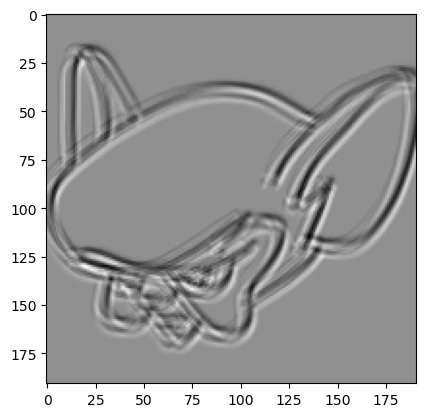

In [15]:
n = 10
conv = nn.Conv2d(in_channels= 1, out_channels= 1, kernel_size= n)
t_img = torch.tensor([[img]]).type(torch.float)
z = conv(t_img)
plt.imshow(z[0,0,:,:].detach().numpy(),cmap = 'gray')

In [3]:
def conv2d(img, kern, stride = 1, padding = 0):
    n_img, m_img = img.size()[2:]
    n_kern,m_kern = kern.size()[2:]
    res = torch.zeros(1,1,int((n_img-n_kern)/stride+1),int((m_img-m_kern)/stride+1))
    for j in range(0,m_img-m_kern+1,stride):
        for i in range(0,n_img-n_kern+1,stride):
            res[0,0,int(i/stride),int(j/stride)] = torch.sum(torch.mul(kern[0,0,:,:],img[0,0,i:i+m_kern,j:j+n_kern])).item()
    n_res, m_res = res.size()[2:]
    pad = torch.zeros(1,1,n_res + 2*padding ,m_res + 2*padding)
    pad[:,:,padding:n_res+padding,padding:m_res+padding] = res
    return pad

tensor([[[[0., 0., 0., 1.],
          [0., 0., 0., 1.],
          [0., 0., 0., 1.],
          [0., 1., 0., 1.]]]]) 
 tensor([[[[1, 1],
          [1, 1]]]]) 
 tensor([[[[0., 2.],
          [1., 2.]]]])


<Figure size 640x480 with 0 Axes>

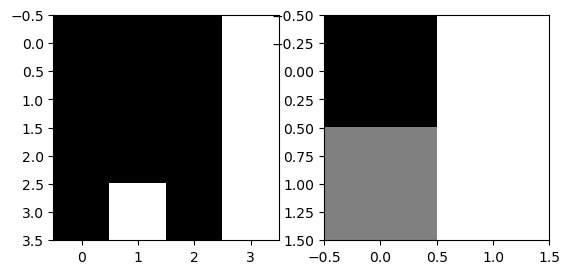

In [4]:
test = torch.zeros(1,1,4,4)
test[:,:,:,-1] = 1
test[:,:,-1,1] = 1

kern = torch.tensor([[[[1,1],
                       [1,1]]]])
res = conv2d(test,kern,2)
print(test,"\n", kern,"\n", res)
plt.figure()
f,axs = plt.subplots(1,2)
axs[0].imshow(test[0,0,:,:],cmap='gray')
axs[1].imshow(res[0,0,:,:], cmap = 'gray')


In [5]:
print(test[0,0,:,:],'\n',kern)

tensor([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 1., 0., 1.]]) 
 tensor([[[[1, 1],
          [1, 1]]]])


In [ ]:
kern = 1/16*torch.tensor([[[[1,2,1],
                       [ 2,4,2],
                       [1,2,1]]]])
kern = torch.randn(1,1,5,5)
#plt.subplot(1,2,2)
#plt.imshow(img, cmap = 'gray')
#plt.subplot(2,2,2)
plt.imshow(conv2d(t_img,kern,1)[0,0,:,:],cmap = 'gray')

## Activation functions for convolutions and Maxpooling

### Max Pooling
The goal of Max Pooling is in theory quite simple: By reducing the size of the activation maps, the number of parameters will also decrease. Furthermore, the impact of small changes in the image will also be reduced. Similar to convolution, in Max Pooling a predefined matrix traverses over the image but instead of multiplying and adding each element of image which is covered by the matrix, the maximum value is selected.

In [ ]:
def maxpool2d(img, n_pool, stride = 1, padding = 0):
    n_img, m_img = img.size()[2:]
    res = torch.zeros(1,1,int((n_img-n_pool)/stride+1),int((m_img-n_pool)/stride+1))
    for j in range(0,m_img-n_pool+1,stride):
        for i in range(0,n_img-n_pool+1,stride):
            res[0,0,int(i/stride),int(j/stride)] = torch.max(img[0,0,i:i+n_pool,j:j+n_pool]).item()
    n_res, m_res = res.size()[2:]
    pad = torch.zeros(1,1,n_res + 2*padding ,m_res + 2*padding)
    pad[:,:,padding:n_res+padding,padding:m_res+padding] = res
    return pad

In [ ]:
plt.figure()
f,axs = plt.subplots(1,2)
axs[0].imshow(t_img[0,0,:,:],cmap='gray')
axs[1].imshow(maxpool2d(t_img,5)[0,0,:,:], cmap = 'gray')

Instead of directly applying Max Pooling to the image, we should first apply an activation function, in order to avoid giving unnecessary details in the picture too much weight.
The default activation function could be chosen as ReLu, but independent of that the procedure is quite simple so we won't dive into that: Apply to each pixel of the image the activation function.

tensor([[[[ 1,  1,  1],
          [ 0,  0,  0],
          [-1, -1, -1]]]])


<Figure size 640x480 with 0 Axes>

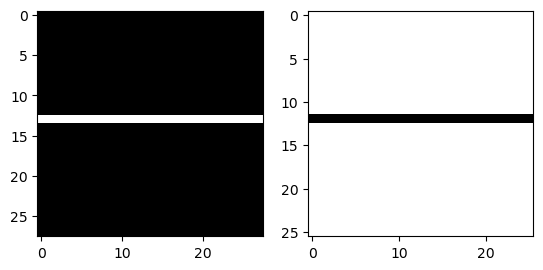

In [55]:
test_ = torch.zeros(1,1,28,28)
test_[0,0,13,:] = 1
kern_shift = torch.tensor([[[[1,0,-1],
                       [1,0,-2],
                       [1,0,-1]]]])
kern =  torch.tensor([[[[1,1,1],
                       [0,0,0],
                       [-1,-1,-1]]]])

print(kern)
plt.figure()
f,axs = plt.subplots(1,2)
axs[0].imshow(test_[0,0,:,:],cmap='gray')
axs[1].imshow(conv2d(test_,kern_shift)[0,0,:,:], cmap = 'gray')

## Multichannel Input and Output
### Multiuple output channels

In [60]:
conv = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3)
conv_ = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3)

conv.state_dict()['bias'][:] = torch.tensor([0.0, 0.0, 0.0])

kern_ridge = torch.tensor([[0,-1,0],[-1,4,-1],[0,-1,0]])
kern_edge = torch.tensor([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kern_sharp = torch.tensor([[0,-1,0],[-1,5,-1],[0,-1,0]])

conv.state_dict()['weight'][0][0] = kern_ridge
conv.state_dict()['weight'][1][0] = kern_edge
conv.state_dict()['weight'][2][0] = kern_sharp

In [61]:
res = conv_(test_)
print(conv.state_dict()['bias'][:])

tensor([0., 0., 0.])


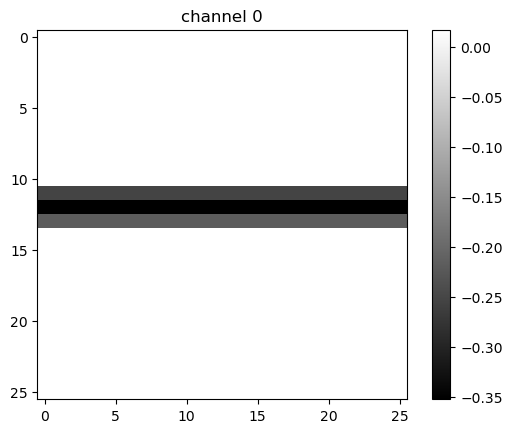

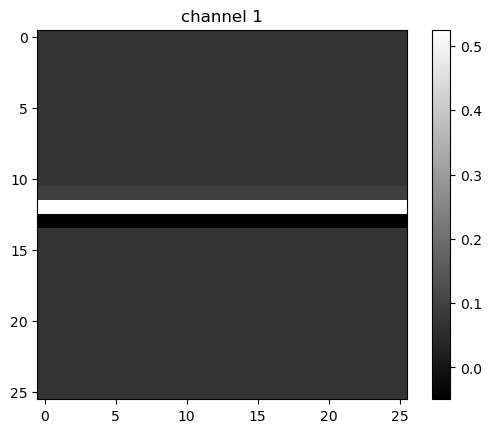

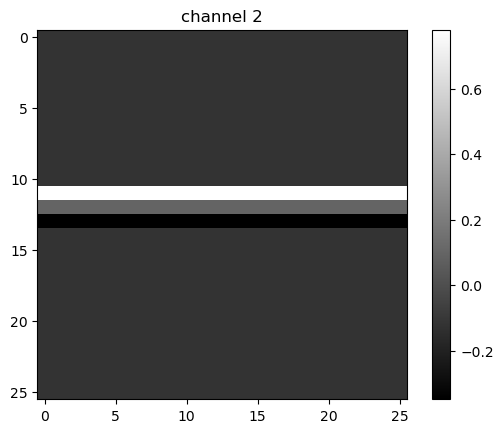

In [63]:
for channel,image in enumerate(res[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

### Multiple input channels


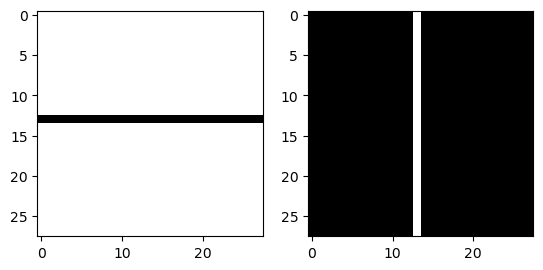

In [77]:
test__ = torch.zeros(1,2,28,28)
test__[0,0,13,:] = -1
test__[0,1,:,13] = 1
plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
plt.imshow(test__[0][0], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(test__[0][1], cmap = 'gray')

torch.Size([1, 1, 26, 26])


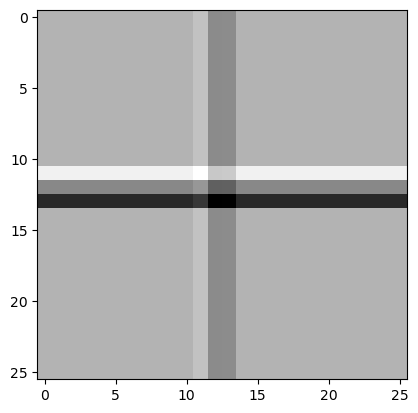

In [83]:
conv__ = nn.Conv2d(in_channels=2,out_channels=1, kernel_size=3)
res = conv__(test__)
print(res.shape)
plt.imshow(res[0,0].detach(), cmap = 'gray')

### Multiple input and output channel

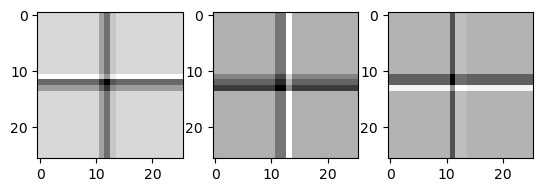

In [98]:
conv___ = nn.Conv2d(in_channels=2,out_channels=3, kernel_size= 3)
res = conv___(test__)
plt.subplots(1,res.shape[1])
for i,img in enumerate(res[0]):
    plt.subplot(1,res.shape[1],i+1)
    plt.imshow(img.detach(),cmap = 'gray')

# Convolutional Neural Networks


<img src="CNN.png" alt="Alternative text" />

## CNN for the MNIST Data

In [113]:
IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])
remote = 'C:/Users/Rick/Documents/Blog/posts/post-with-code/Pytorch'
local = 'C:/Users/lachlinu/PycharmProjects/Blog/posts/post-with-code/Pytorch'
train_dataset = dsets.MNIST(root=local, train=True, download=False, transform=composed)
test_dataset = dsets.MNIST(root=local, train=False, download=False, transform=composed)

In [114]:
class CNN(nn.Module):

    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x


In [115]:
model = CNN(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=5000)

In [116]:
n_epochs=10
cost_list=[]
accuracy_list=[]
N_test=len(test_dataset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data

        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)

train_model(n_epochs)

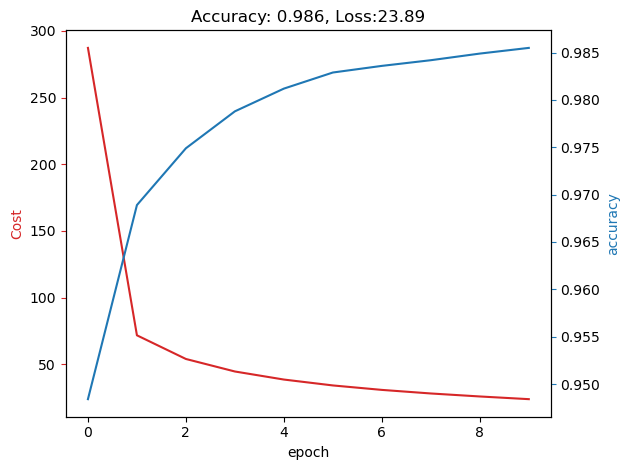

In [119]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch')
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
plt.title("Accuracy: {0:.3f}, Loss:{1:.2f}".format(accuracy_list[-1],cost_list[-1]));
fig.tight_layout()